# SQLite Workshop

### Load Libraries

In [80]:
import sqlite3
import pandas as pd

### Load GitHub repo

In [81]:
%cd /content/
%rm -r ./2022TeamBDataEngineeringBC
!git clone https://github.com/Fuenfgeld/2022TeamBDataEngineeringBC.git
%cd ./2022TeamBDataEngineeringBC/

/content
Cloning into '2022TeamBDataEngineeringBC'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 103 (delta 55), reused 65 (delta 26), pack-reused 0
Receiving objects: 100% (103/103), 74.89 KiB | 3.74 MiB/s, done.
Resolving deltas: 100% (55/55), done.
/content/2022TeamBDataEngineeringBC


### Connect to Database

In [82]:
conn = sqlite3.connect('sqlite_example.db')
cursor = conn.cursor()
print("Opened database successfully");

Opened database successfully


### Load CSVs into Dataframe

In [83]:
food = pd.read_csv('tables/Futter.csv', sep=";")
producer = pd.read_csv('tables/Futterhersteller.csv', sep=";")
animals = pd.read_csv('tables/Tiere.csv', sep=";")

### Create Tables

In [84]:
cursor.execute('''
		CREATE TABLE IF NOT EXISTS producer (
			ID int primary key,
            Name nvarchar(50),
			Firmensitz nvarchar(50),
			Produktionsstaette nvarchar(50)
			)
               ''')


cursor.execute('''
		CREATE TABLE IF NOT EXISTS food (
			F_ID int primary key,
            Art nvarchar(50),
			Kosten_pro_KG float,
            Enthaelt_Fleisch boolean,
            Hersteller int,
			foreign key(Hersteller) references producer(ID)
			)
               ''')

cursor.execute('''
		CREATE TABLE IF NOT EXISTS animals (
			id int primary key,
            Tier nvarchar(50),
            Lebenserwartung float,
			Klasse nvarchar(50),
			Hoehe_in_cm int,
            Schnitt_Gewicht_in_KG float,
            Anschaffungskosten_in_Euro int,
            Kosten_Grundausstattung_in_Euro int,
			Tierarztkosten int,
			Futter int,
            Futtermenge_in_KG_pro_Monat float,
			Mindestanzahl_Tiere int,
			Beschaeftigung int,
			foreign key(Futter) references food(F_ID)

			)
               ''') 

### Insert Dataframe in Table

In [85]:
producer.to_sql('producer', conn, if_exists='append', index=False)
food.to_sql('food', conn, if_exists='append', index=False)
animals.to_sql('animals', conn, if_exists='append', index=False)

### Output table contents

In [86]:
print(pd.read_sql_query("SELECT * FROM producer", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("SELECT * FROM food", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("SELECT * FROM animals", conn))

   ID              Name   Firmensitz Produktionsstaette
0   1   Wau Dosenfutter  Deutschland        Deutschland
1   2  Miau Dosenfutter   Frankreich        Deutschland
2   3  Jerry's Getreide        China              China
3   4          Hottehue        China             Taiwan
4   5             Blubb     Atlantis           Atlantis
--------------------------------------------------------
   F_ID               Art Kosten_pro_KG  Enthaelt_Fleisch  Hersteller
0     1       Hundefutter       04. Mrz                 1           1
1     2      Katzenfutter       02. Jul                 1           2
2     3  Getreidemischung          10.0                 0           3
3     4     Hamsterfutter           2.0                 0           3
4     5      Pferdefutter          0.65                 0           4
5     6       Fischfutter       02. Mai                 0           5
6     7   Kaninchenfutter          None                 0           3
7     8       Vogelfutter          None        

### Output Table Info


In [87]:
print(pd.read_sql_query("PRAGMA table_info('producer')", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("PRAGMA table_info('food')", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("PRAGMA table_info('animals')", conn))

   cid                name          type  notnull dflt_value  pk
0    0                  ID           int        0       None   1
1    1                Name  nvarchar(50)        0       None   0
2    2          Firmensitz  nvarchar(50)        0       None   0
3    3  Produktionsstaette  nvarchar(50)        0       None   0
--------------------------------------------------------
   cid              name          type  notnull dflt_value  pk
0    0              F_ID           int        0       None   1
1    1               Art  nvarchar(50)        0       None   0
2    2     Kosten_pro_KG         float        0       None   0
3    3  Enthaelt_Fleisch       boolean        0       None   0
4    4        Hersteller           int        0       None   0
--------------------------------------------------------


### INNER JOIN

SQLite INNER JOIN gibt die Datensätze zurück, bei denen sich tabel1 und tabel2 überschneiden.

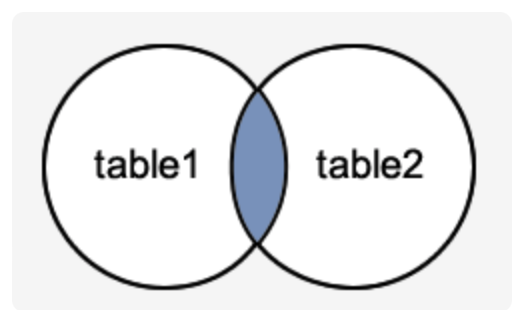


In [ ]:
print(pd.read_sql_query("SELECT producer.ID, producer.Name,food.ID, food.Art, food.Hersteller FROM producer INNER JOIN food ON producer.ID = food.Hersteller", conn))

###  LEFT JOIN

SQLite LEFT OUTER JOIN gibt alle Datensätze aus tabele1 und nur die Datensätze aus tabele2 zurück, die sich mit Tabelle1 überschneiden.

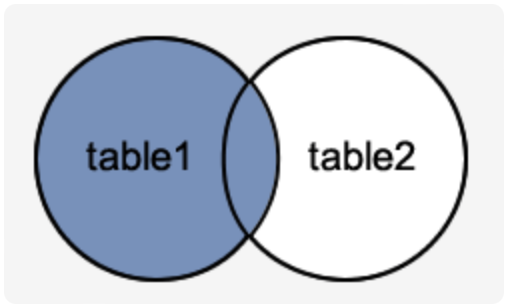

In [ ]:
print(pd.read_sql_query("SELECT producer.ID, producer.Name,food.F_ID,food.Art FROM producer LEFT OUTER JOIN food ON producer.ID = food.Hersteller", conn))

### Close connection

In [88]:
conn.close()